In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import nltk


In [0]:
# mount your Google Drive
drive.mount("/content/gdrive") 

In [0]:
path=F'/content/gdrive/My Drive/Data606/Data/Foreign_Exchange_Rates.csv'
df=pd.read_csv(path)

In [3]:
df=df.drop('Unnamed: 0', axis=1)
df=df.replace(to_replace='ND', value=np.NaN)
df=df.set_index('Time Serie')
df = df.apply(pd.to_numeric)
df.head(1000)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10-27,1.4209,0.8502,1.6402,0.5899,2.8710,1.3107,8.2767,7.7541,45.40,1183.0,11.1195,6.880,1.7430,6.3230,108.38,3.8,7.0230,7.7250,94.45,1.3159,33.95,39.99
2003-10-28,1.4182,0.8555,1.6340,0.5898,2.8625,1.3108,8.2766,7.7578,45.31,1186.0,11.0670,6.950,1.7455,6.3594,108.33,3.8,7.0364,7.7478,94.62,1.3287,33.95,39.98
2003-10-29,1.4190,0.8567,1.6329,0.5887,2.8540,1.3098,8.2766,7.7595,45.36,1179.0,11.1500,6.920,1.7362,6.3670,108.18,3.8,7.0534,7.7181,94.62,1.3293,33.95,39.95


In [0]:
pf=df.pct_change(periods=30)

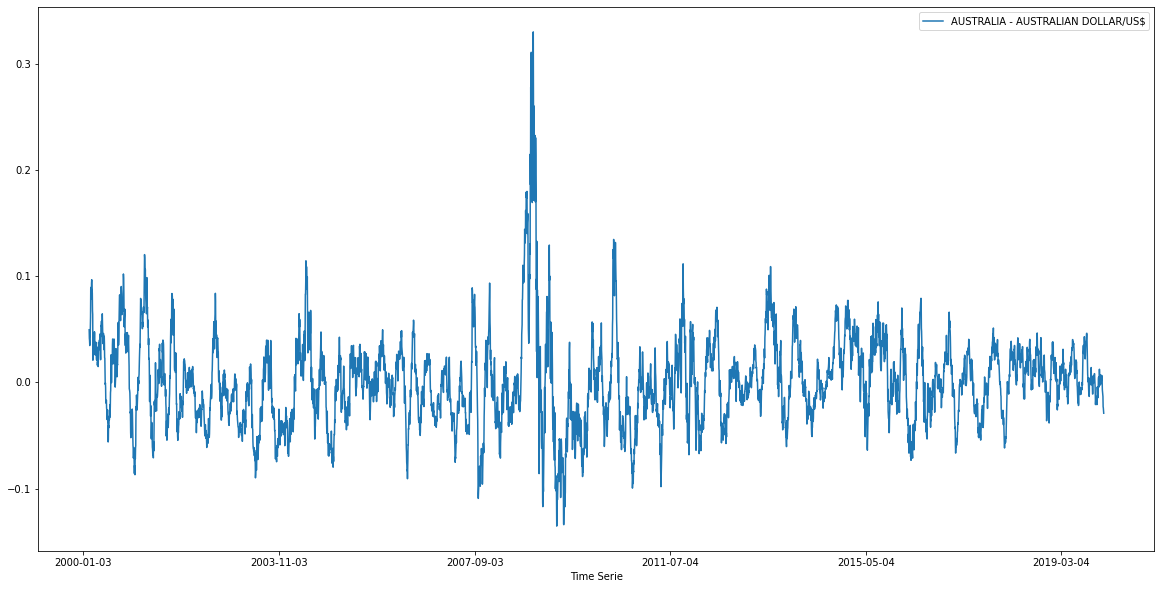

In [5]:
pf['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].plot(legend=True,figsize=(20,10))

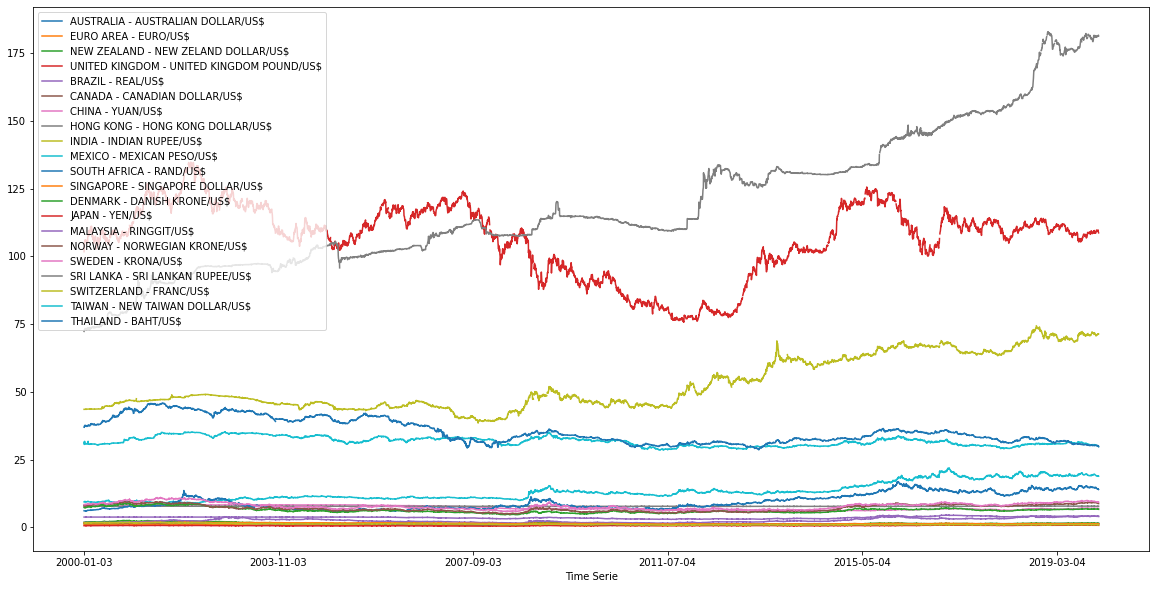

In [7]:
#df.plot(x='Time Serie')
df.drop('KOREA - WON/US$',axis=1).plot(legend=True,figsize=(20,10))

In [0]:
path=F'/content/gdrive/My Drive/Data606/Data/abcnews-date-text.csv'
df1=pd.read_csv(path)

In [9]:
df1.head(5)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [16]:
print(df1[df1['headline_text'].str.contains("china")].count())
print(df1[df1['headline_text'].str.contains("australia")].count())
print(df1[df1['headline_text'].str.contains(" uk ")].count())
print(df1[df1['headline_text'].str.contains("united kingdom")].count())
print(df1[df1['headline_text'].str.contains("euro")].count())
print(df1[df1['headline_text'].str.contains(" us ")].count())
print(df1[df1['headline_text'].str.contains("america")].count())
print(df1[df1['headline_text'].str.contains("japan")].count())
print(df1[df1['headline_text'].str.contains("brazil")].count())
print(df1[df1['headline_text'].str.contains("nz")].count())
print(df1[df1['headline_text'].str.contains("canada")].count())
print(df1[df1['headline_text'].str.contains("hong kong")].count())

publish_date     8344
headline_text    8344
dtype: int64
publish_date     31675
headline_text    31675
dtype: int64
publish_date     1095
headline_text    1095
dtype: int64
publish_date     12
headline_text    12
dtype: int64
publish_date     2922
headline_text    2922
dtype: int64
publish_date     9214
headline_text    9214
dtype: int64
publish_date     1816
headline_text    1816
dtype: int64
publish_date     4803
headline_text    4803
dtype: int64
publish_date     1203
headline_text    1203
dtype: int64
publish_date     7047
headline_text    7047
dtype: int64
publish_date     739
headline_text    739
dtype: int64
publish_date     984
headline_text    984
dtype: int64


In [15]:
print(df1[df1['headline_text'].str.contains("central bank")].count())
print(df1[df1['headline_text'].str.contains("quantitative easing")].count())
print(df1[df1['headline_text'].str.contains("inflation")].count())
print(df1[df1['headline_text'].str.contains("interest rate")].count())
print(df1[df1['headline_text'].str.contains("inflation rate")].count())
print(df1[df1['headline_text'].str.contains("savings account")].count())
print(df1[df1['headline_text'].str.contains("debt")].count())
print(df1[df1['headline_text'].str.contains("buy")].count())
print(df1[df1['headline_text'].str.contains("sell")].count())
print(df1[df1['headline_text'].str.contains("bond market")].count())
print(df1[df1['headline_text'].str.contains("tariff")].count())

publish_date     85
headline_text    85
dtype: int64
publish_date     8
headline_text    8
dtype: int64
publish_date     615
headline_text    615
dtype: int64
publish_date     943
headline_text    943
dtype: int64
publish_date     16
headline_text    16
dtype: int64
publish_date     1
headline_text    1
dtype: int64
publish_date     1555
headline_text    1555
dtype: int64
publish_date     2796
headline_text    2796
dtype: int64
publish_date     3535
headline_text    3535
dtype: int64
publish_date     5
headline_text    5
dtype: int64
publish_date     273
headline_text    273
dtype: int64


In [0]:
def isPeak(arr, n, num, i, j):

    # If num is smaller than the element
    # on the left (if exists)
    if (i >= 0 and arr[i] > num):
        return False

    # If num is smaller than the element
    # on the right (if exists)
    if (j < n and arr[j] > num):
        return False
    return True

# Function that returns true if num is
# smaller than both arr[i] and arr[j]
def isTrough(arr, n, num, i, j):

    # If num is greater than the element
    # on the left (if exists)
    if (i >= 0 and arr[i] < num):
        return False

    # If num is greater than the element
    # on the right (if exists)
    if (j < n and arr[j] < num):
        return False
    return True


def XSetup(df_train):
    arr = df_train['Percent 2 Day'].values.tolist()
    df = df_train
    n = len(arr)
    peak_ind = []
    valley_ind = []
    data_x = df.index.tolist()
    data_y = df['Percent 2 Day']

    for i in range(n):
        # If the current element is a peak
        if (isPeak(arr, n, arr[i], i - 1, i + 1)):
            # print(arr[i], end = " ")
            peak_ind.append(i)

    for i in range(n):
        # If the current element is a trough
        if (isTrough(arr, n, arr[i], i - 1, i + 1)):
            # print(arr[i], end = " ")
            valley_ind.append(i)

    peak_x = peak_ind[2:]
    peak_y = data_y[peak_ind]
    valley_x = valley_ind[2:]
    valley_y = data_y[valley_ind]
    
    return peak_x,peak_y,valley_x,valley_y